In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1.importing data

In [3]:
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### 2.1 getting data ready

In [4]:
data.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.rename({'Unnamed: 0': 'Name'}, axis=1,inplace=True)

In [6]:
data['Name']=data['Name'].astype('category') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      50 non-null     category
 1   Murder    50 non-null     float64 
 2   Assault   50 non-null     int64   
 3   UrbanPop  50 non-null     int64   
 4   Rape      50 non-null     float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 4.2 KB


In [7]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 5)

### 2.2 outliers detection

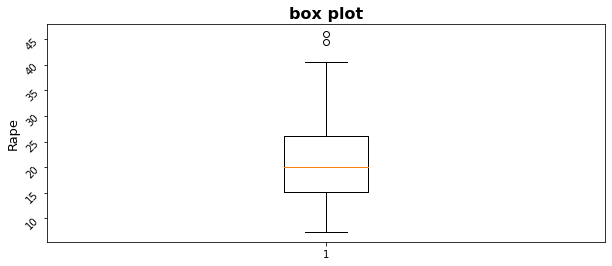

In [8]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("Rape", fontsize = 13 )                                           #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


plt.boxplot(x='Rape', data=data)                                                #outlier
# plt.boxplot(x='Murder', data=data)                                            #no outlier
# plt.boxplot(x='Assault', data=data)                                           #no outlier
# plt.boxplot(x='UrbanPop', data=data)                                          #no outlier


plt.show()                                                                   #print/display the plot
#plt.savefig("Used Cars Bar.png")                                            #to create a .png file of our plot

In [9]:
print(np.where(data['Rape']>42))
#average rape rate is 21 ; replace rape rate by 21 for outliers 
#don't delete the record becoz of outliers ;
#also we don't want to have outliers
#so replace these with median or mode

(array([ 1, 27], dtype=int64),)


In [10]:
data['Rape'][1] = 21
data['Rape'][27] = 21

### 2.3 scaling of data

In [11]:
# standardization of data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_s=pd.DataFrame(x_scaled)
data_s.columns=['Murder','Assault','UrbanPop','Rape']
data_s = pd.concat([data['Name'],data_s],axis=1)
data_s.head()

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,1.255179,0.790787,-0.526195,0.119185
1,Alaska,0.513019,1.118060,-1.224067,0.093772
2,Arizona,0.072361,1.493817,1.009122,1.364401
3,Arkansas,0.234708,0.233212,-1.084492,-0.096822
4,California,0.281093,1.275635,1.776781,2.584205


In [12]:
# Normalization of data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_n=pd.DataFrame(x_scaled)
data_n.columns=['Murder','Assault','UrbanPop','Rape']

data_n = pd.concat([data['Name'],data_n],axis=1)
data_n.head()

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,0.746988,0.654110,0.440678,0.417417
1,Alaska,0.554217,0.746575,0.271186,0.411411
2,Arizona,0.439759,0.852740,0.813559,0.711712
3,Arkansas,0.481928,0.496575,0.305085,0.366366
4,California,0.493976,0.791096,1.000000,1.000000


In [13]:
# # ORRRRRRR
# #Normalization function 

# def norm_func(i):
#     x = (i-i.min())/(i.max()-i.min())
#     return (x)

# # Normalized data frame (considering the numerical part of data)
# df_norm = norm_func(data.iloc[:,1:])
# df_norm

### 3. creating dendrogram

#### a) for standardized data 

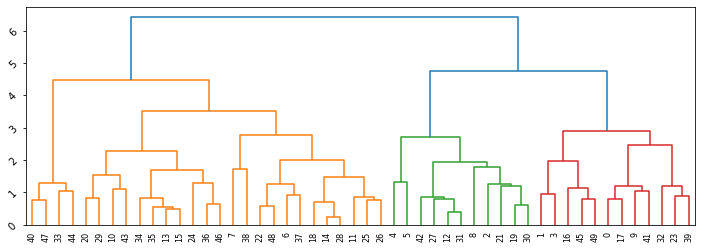

In [14]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,4))  
plt.yticks( rotation = 45, fontsize = 10)  

dendrogram = sch.dendrogram(sch.linkage(data_s.iloc[:,1:], method='complete'))

plt.show()

In [15]:
#it is upto us to left with how many clusters
#mostly after 4 clusters, we don,t cut our dendrogram

#for y-axis = 1.8, imagine a horizontal line ; we conclude that n_clusters = 4

#### b) for normalised data

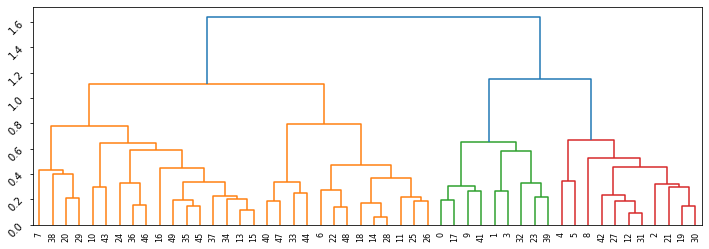

In [16]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,4))  
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size

dendrogram = sch.dendrogram(sch.linkage(data_n.iloc[:,1:], method='complete'))

plt.show()

In [17]:
#it is upto us to left with how many clusters
#mostly after 4 clusters, we don,t cut our dendrogram

#for y-axis = 1.8, imagine a horizontal line ; we conclude that n_clusters = 4

### 4.1  creating clusters

In [18]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
model

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [19]:
# save clusters for chart
y_pred = model.fit_predict(data_n.iloc[:,1:])
clusters=pd.DataFrame(y_pred,columns=['Clusters'])
clusters.head()

,Clusters
0,2
1,2
2,3
3,2
4,3


In [20]:
data['cluster_id'] = model.labels_
data.head()

,Name,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,21.0,2
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3


### 4.2 cluster visualisation

In [21]:
from sklearn import preprocessing                  #transformations of categorical data using LabelEncoder
le = preprocessing.LabelEncoder()
data['Name_id'] = le.fit_transform(data['Name'])
data.drop(['Name'],axis=1,inplace = True)
data.head()


,Murder,Assault,UrbanPop,Rape,cluster_id,Name_id
0,13.2,236,58,21.2,2,0
1,10.0,263,48,21.0,2,1
2,8.1,294,80,31.0,3,2
3,8.8,190,50,19.5,2,3
4,9.0,276,91,40.6,3,4


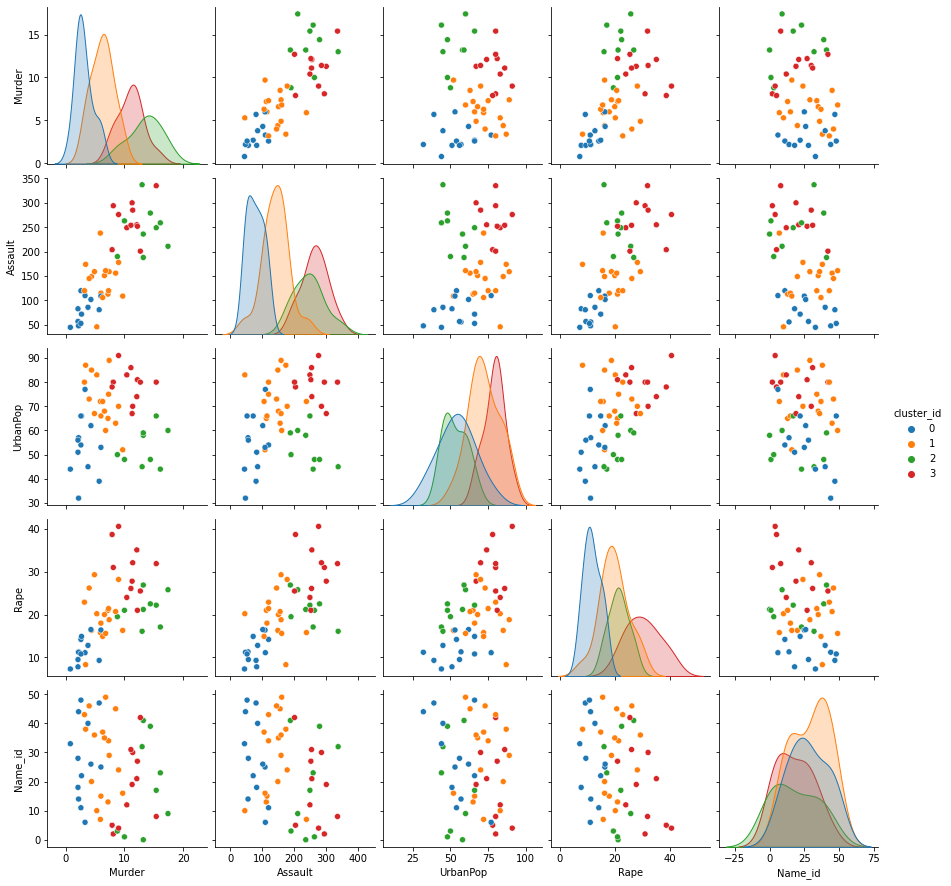

In [22]:
import seaborn as sns
#pal = sns.color_palette("tab")

sns.pairplot(data, 
             palette=sns.color_palette("tab10")[:4],   #[:4] bcoz our color palette has many colors but we need 4 color for 4 clusters 
             hue = 'cluster_id'                        #two different color according cluster_id    
            )

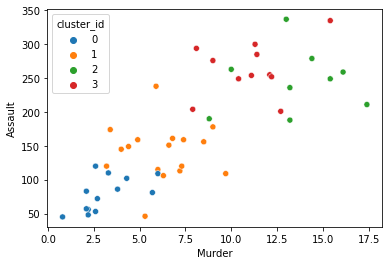

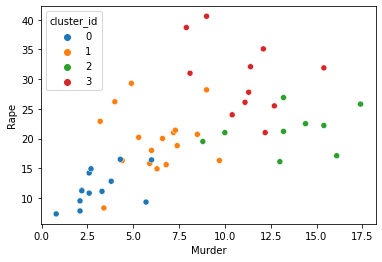

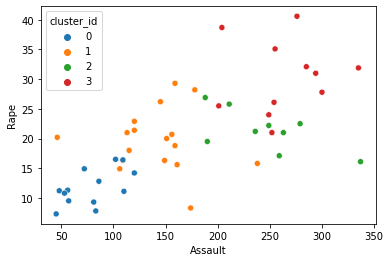

In [23]:
import seaborn as sns

sns.scatterplot(x='Murder', y='Assault', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])                 
plt.show()
sns.scatterplot(x='Murder', y='Rape', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='Assault', y='Rape', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])              
plt.show()

In [24]:
#****************************inferences from the clusters ******************************

#cities belongs to cluster_id = 0 has lowest murder, assault and rape rate
#cities belongs to cluster_id = 2 has slightly higher murder, assault and rape rate than cities belongs to cluster_id = 0
#cities belongs to cluster_id = 1 and 3 has highest crime rate

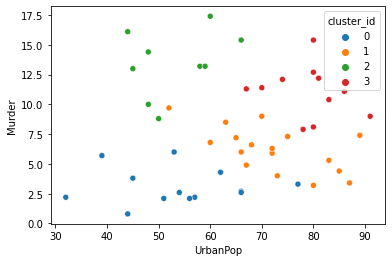

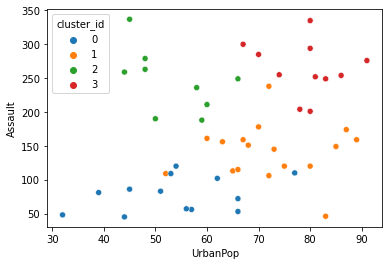

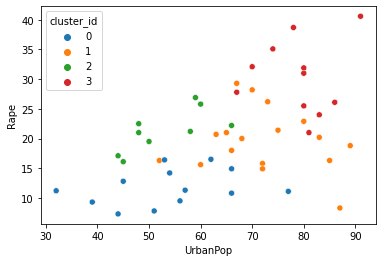

In [25]:
import seaborn as sns

sns.scatterplot(x='UrbanPop', y='Murder', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])                 
plt.show()
sns.scatterplot(x='UrbanPop', y='Assault', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='UrbanPop', y='Rape', data=data, hue = 'cluster_id' ,palette=sns.color_palette("tab10")[:4])              
plt.show()

In [26]:
#****************************inferences from the clusters ******************************

#Rape rate is higher in urban population
#Murder and Assault rate is same in urban and non urban population